 # Model evaluation challenge - US Income

## Importing the Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
sns.set(style='white', context='notebook', palette='deep')



## Loading and exploring the dataset

In [10]:
# Load training and test data into pandas dataframes
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

# merge training and test sets into one dataframe
full = pd.concat([train, test])

In [11]:
# Get size of dataframes
for dataframe in [train, test, full]:
    print(dataframe.shape)

(32561, 15)
(16281, 15)
(48842, 15)


In [12]:
# Number of null values in train and test data

train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [13]:
full.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1


In [14]:
full.dtypes


age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [16]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week',]

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

<AxesSubplot:>

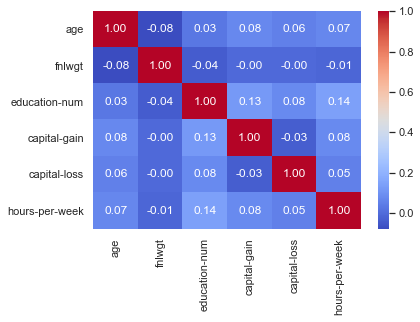

In [17]:
# Correlation matrix between numerical values
g = sns.heatmap(full[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


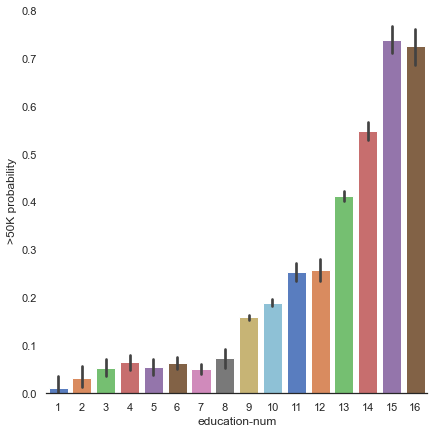

In [18]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=full,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


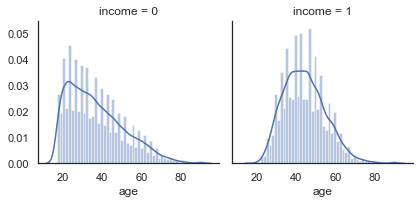

In [19]:
# Explore Age vs Income
g = sns.FacetGrid(full, col='income')
g = g.map(sns.distplot, "age")
g

Text(0, 0.5, 'Income >50K Probability')

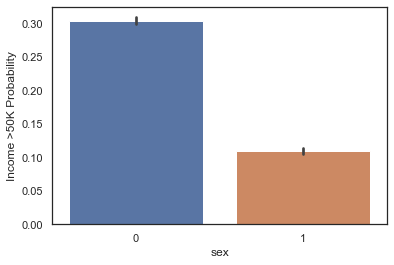

In [20]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=full)
g = g.set_ylabel("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


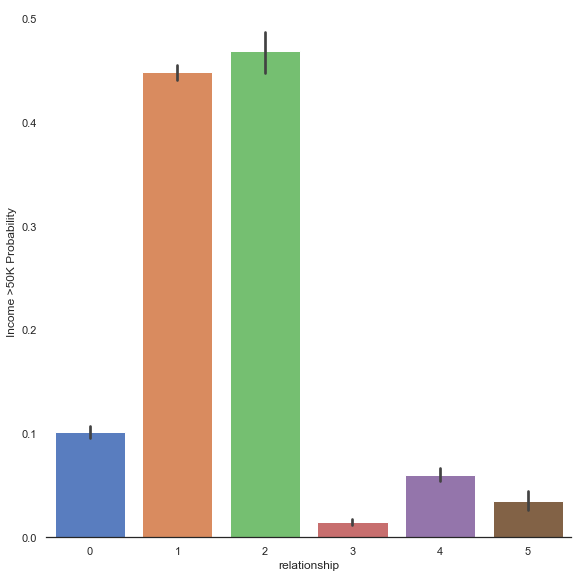

In [21]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=full,kind="bar", size = 8,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


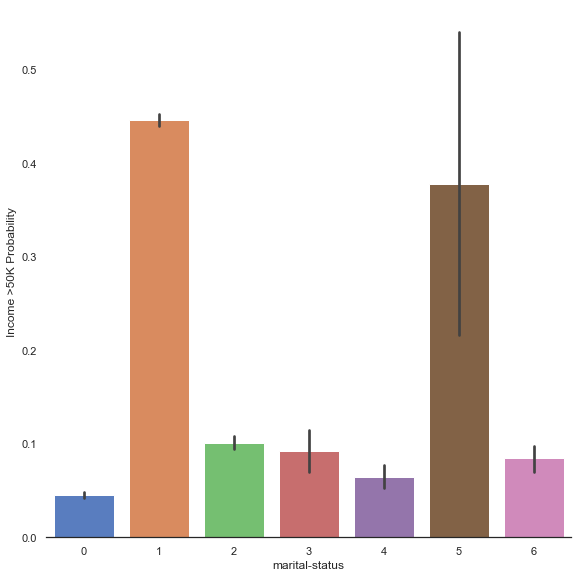

In [22]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=full,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

In [23]:
full[cat_features].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [29]:
X = full.iloc[:, :-1].values
y = full.iloc[:, -1].values

In [30]:
X.shape,y.shape

((48842, 14), (48842,))

## Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
print(X_train)

[[    42      0 197344 ...      0     40      0]
 [    34      2 340940 ...      0     60      0]
 [    32      4 177566 ...      0     50     11]
 ...
 [    41      1 344624 ...      0     60      0]
 [    47      1 104489 ...      0     40      0]
 [    25      2 186925 ...      0     48      0]]


In [33]:
print(y_train)

[0 1 0 ... 1 1 0]


In [34]:
print(X_test)

[[    41      2 151856 ...      0     40      0]
 [    57      1  87584 ...      0     25      0]
 [    31      4 220669 ...      0     40      0]
 ...
 [    25      2 214413 ...      0     40      0]
 [    65      4 205024 ...      0      8      0]
 [    35      0  52738 ...      0     40      0]]


In [35]:
print(y_test)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train)

[[ 0.24480906 -1.87782354  0.07519069 ... -0.21642339 -0.03431036
  -0.25285143]
 [-0.33937091 -0.2550973   1.4398243  ... -0.21642339  1.5704172
  -0.25285143]
 [-0.4854159   1.36762894 -0.11276527 ... -0.21642339  0.76805342
   1.94852725]
 ...
 [ 0.17178656 -1.06646042  1.4748344  ... -0.21642339  1.5704172
  -0.25285143]
 [ 0.60992154 -1.06646042 -0.80723677 ... -0.21642339 -0.03431036
  -0.25285143]
 [-0.99657337 -0.2550973  -0.02382403 ... -0.21642339  0.60758067
  -0.25285143]]


## Training the Random Forest Classification model on the Training set

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8791  565]
 [1197 1658]]


0.8557038735566292

In [52]:
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive:1',
                                         'Actual Negative:0'],
                        index=['Predict Positive:1',
                              'Predict Negative:0'])
cm_matrix

,Actual Positive:1,Actual Negative:0
Predict Positive:1,8791,565
Predict Negative:0,1197,1658


<AxesSubplot:>

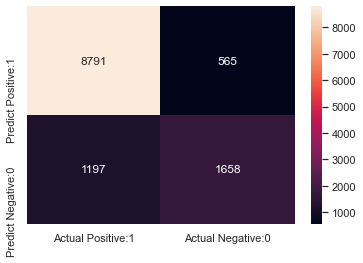

In [53]:
sns.heatmap(cm_matrix,annot=True,fmt='d')

## Applying k-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.01 %
Standard Deviation: 0.58 %


### Prediction accuracy score & n-estimators 

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred)


0.8557038735566292

In [57]:
# n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=42)
rfc_100.fit(X_train,y_train)
y_pred_100 = rfc_100.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred_100)

0.8608631561706658

-> I have used all the features given in the model.
NEXT, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follow

In [59]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [60]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [61]:
clf.feature_importances_

array([0.14852701, 0.038223  , 0.17430778, 0.02848209, 0.0865605 ,
       0.09651102, 0.07418513, 0.06554975, 0.01386843, 0.01973256,
       0.11837691, 0.03568402, 0.08309156, 0.01690026])

## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
# create model
model = RandomForestClassifier()

In [ ]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
## Applying Grid Search to find the best model and the best parameters


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

## RandomTreeClassifier hyperparameter tuning by RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 8, verbose=5, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.0min


In [70]:
# Set up space dictionary with specified hyperparameters
space = {
    'max_depth': X.quniform('max_depth', 2, 10, 2),
    'min_samples_leaf': X.quniform('min_samples_leaf', 2, 8, 2),
    'learning_rate': X.uniform('learning_rate', 0.001, 0.9)
}

# Set up objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'learning_rate': params['learning_rate']
    }
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best_result = fmin(
    fn=objective,
    space=space,
    max_evals=100,
    rstate=np.random.RandomState(73),
    algo=tpe.suggest
)

print(best_result)

AttributeError: 'numpy.ndarray' object has no attribute 'quniform'

In [85]:
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.750 (0.120)


In [86]:
def get_model():
    model = RandomForestClassifier()
    return model

In [87]:

# evaluate the model using a given test condition
def evaluate_model(cv):
# get the dataset
    X, y = get_dataset()
    # get the model
    model = get_model()
# evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# return scores
    return mean(scores), scores.min(), scores.max()

In [88]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(RandomForestClassifier())
print('Ideal: %.3f' % ideal)

NameError: name 'get_dataset' is not defined